24
24


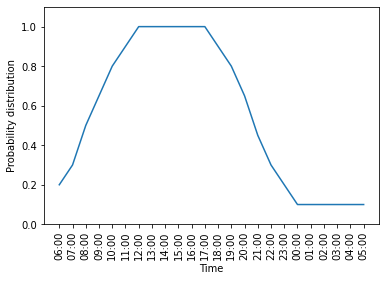

In [55]:
from model_lomba import *
import matplotlib.pyplot as plt
import seaborn as sns

demand = [0.2,0.3,0.5,0.65,0.8,0.9,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,0.65,0.45,0.3,0.2,0.1,0.1,0.1,0.1,0.1,0.1]
hour = ["06:00","07:00","08:00","09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00","00:00","01:00","02:00","03:00","04:00","05:00"]
print(len(demand))
print(len(hour))

plt.plot(hour,demand)
plt.xticks(rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('Probability distribution')
plt.title('')
plt.ylim([0.0,1.1])
#plt.tight_layout()
#plt.savefig('Prob-dist.png', format = 'png' )
plt.show()

In [56]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50

#With inventory
inv_size = 15
cp_size = int(np.ceil(inv_size/3))

#Without inventory
#cp_size = 10

model = switching_model(num_of_motorist=50,num_of_stations=10,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="less", demand = demand)

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

4
4


In [57]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position       Charge Alive  Full_battery  Empty_battery  \
Step AgentID                                                            
0    0           None  1283.846883  None           NaN            NaN   
     1           None   901.975833  None           NaN            NaN   
     2           None  2234.817032  None           NaN            NaN   
     3           None  1318.657267  None           NaN            NaN   
     4           None  1861.229891  None           NaN            NaN   

              CP_full  CP_empty  
Step AgentID                     
0    0            NaN       NaN  
     1            NaN       NaN  
     2            NaN       NaN  
     3            NaN       NaN  
     4            NaN       NaN

In [58]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
130     True
131     True
132    False
133     True
134     True
135    False
136     True
137     True
138     True
139     True
140    False
141     True
142     True
143     True
144     True
145     True
146    False
147    False
148     True
149     True
150    False
151     True
152    False
153     True
154    False
155    False
156     True
157     True
158     True
159     True
160     True
161    False
162    False
163     True
164     True
165     True
166    False
167     True
168     True
169    False
170     True
171     True
172    False
173     True
174    False
175    False
176     True
177    False
178     True
179     True
Name: Alive, dtype: object

In [59]:

agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
180    (11, 11)
181    (11, 36)
182    (36, 11)
183    (36, 36)
Name: Position, dtype: object


In [60]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
180    15.0
181    15.0
182    15.0
183    15.0
Name: Full_battery, dtype: float64


In [61]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
180    0.0
181    0.0
182    0.0
183    0.0
Name: Empty_battery, dtype: float64


In [62]:
agent_cp_full = agent_data.xs(step_station,level = "Step")["CP_full"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_full = agent_cp_full[station_id]
print(station_cp_full)

AgentID
180    4.0
181    5.0
182    3.0
183    5.0
Name: CP_full, dtype: float64


In [63]:
agent_cp_empty = agent_data.xs(step_station,level = "Step")["CP_empty"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_empty = agent_cp_empty[station_id]
print(station_cp_empty)

AgentID
180    1.0
181    0.0
182    2.0
183    0.0
Name: CP_empty, dtype: float64


In [64]:
#Ambil data motorist
driver_num = 0
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
20155    (35, 42)
20156    (35, 42)
20157    (35, 42)
20158    (35, 42)
20159    (35, 42)
Name: Position, dtype: object

Text(0, 0.5, 'y')

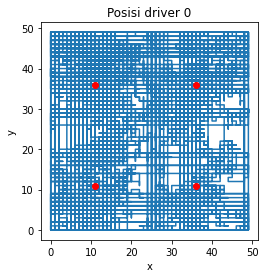

In [65]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')

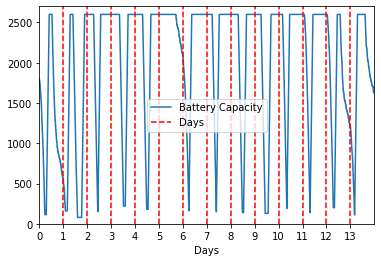

In [66]:
#Cek baterai
battery_id = 8
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()
plt.xlim(0,num_of_step)
plt.ylim(0,2700)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Battery Capacity','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Example of Battery Charge Cycle')
plt.show()

In [67]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive,num_of_charging
20155,33,3
20156,33,3
20157,33,3
20158,33,3
20159,33,3


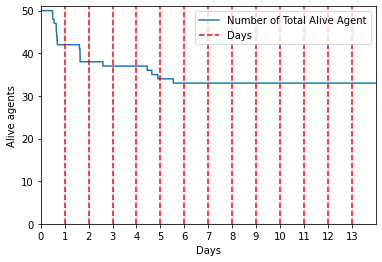

In [68]:
plt.plot(model_data["num_of_alive"])
plt.ylim([0,num_of_motorist + 1])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

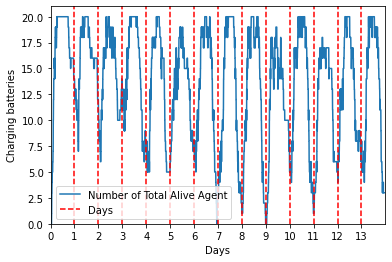

In [69]:
plt.plot(model_data["num_of_charging"])
plt.ylim([0,model.num_of_stations*model.cp_size +1])
plt.ylabel("Charging batteries")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

In [70]:
#dapetin semua motor
motorist_id = []
for mot in model.motorists:
    motorist_id.append(mot.unique_id)

#ID motor pertama dan terakhir
first_motor = min(motorist_id)
last_motor = max(motorist_id)

#Ambil data motor doang
motorist_data = agent_data.loc[(agent_data.index.get_level_values('AgentID')>=first_motor) & (agent_data.index.get_level_values('AgentID') <=last_motor)]


motorist_alive_position = motorist_data.loc[motorist_data['Alive'] == True]["Position"]
motorist_alive_position.tail()

#print jumlah baris
print(len(motorist_alive_position.index))

713518


In [71]:
array_alive_positions = motorist_alive_position.tolist()
print(len(array_alive_positions))

713518


Text(33.0, 0.5, 'y')

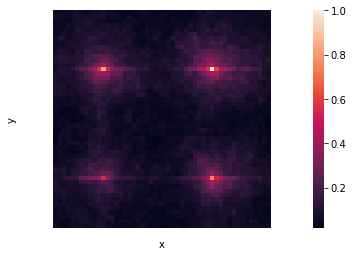

In [72]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data)
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
ax.set_xlabel('x')
ax.set_ylabel('y')



    